Files already downloaded and verified
Files already downloaded and verified


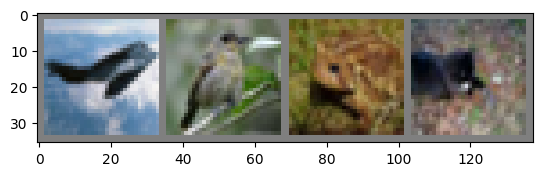

plane bird  frog  cat  


In [1]:
from model import *
from data import *
from utils import imshow

In [2]:
device = 'cpu'
if torch.backends.mps.is_available(): # type: ignore
    device = 'mps'  # enables training on the Macbook Pro's GPU
elif torch.cuda.is_available():
    device = 'cuda:0'

print(device)

net.to(device)

mps


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [3]:
train(device)

[1,  2000] loss: 2.164
[1,  4000] loss: 1.897
[1,  6000] loss: 1.697
[1,  8000] loss: 1.597
[1, 10000] loss: 1.549
[1, 12000] loss: 1.496
[2,  2000] loss: 1.426
[2,  4000] loss: 1.403
[2,  6000] loss: 1.348
[2,  8000] loss: 1.328
[2, 10000] loss: 1.328
[2, 12000] loss: 1.299
Finished Training


In [4]:
PATH = './cifar_net_gpu.pth'
torch.save(net.state_dict(), PATH)

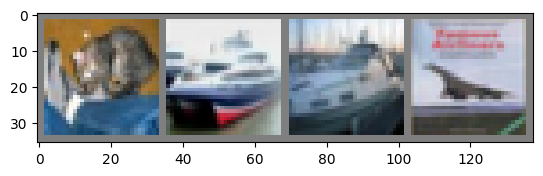

GroundTruth:  cat   ship  ship  plane
Predicted:  bird  car   truck ship 
Accuracy of the network on the 10000 test images: 54 %
Accuracy for class: plane is 43.8 %
Accuracy for class: car   is 69.1 %
Accuracy for class: bird  is 52.4 %
Accuracy for class: cat   is 38.6 %
Accuracy for class: deer  is 38.3 %
Accuracy for class: dog   is 62.6 %
Accuracy for class: frog  is 54.2 %
Accuracy for class: horse is 45.0 %
Accuracy for class: ship  is 76.5 %
Accuracy for class: truck is 60.0 %


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

test(net)